<a href="https://colab.research.google.com/github/piya8/Machine_Learning_Algorithm/blob/main/Logistics_Regression_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ############# Logistics regression    ################## 
accuracy of  LogisticRegression 
confusion meteric for training data


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

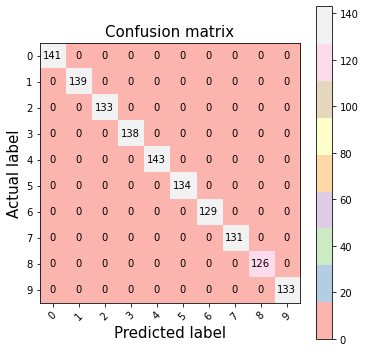

confusion meteric for test data


<Figure size 432x288 with 0 Axes>

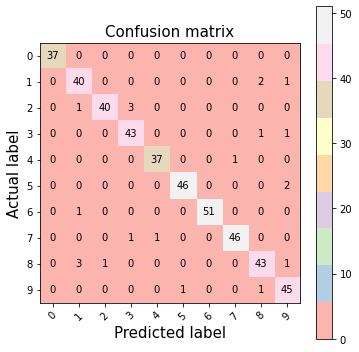

TOP 3rd Accuracy of Digits Data set  100.0


In [1]:
"""
Created on Thu Apr 12 21:32:52 2018

@author: priyanka
"""###### Necessory Imports 
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#print(digits)
#print(digits.data.shape)
#print(Digits_x_train.shape)
#print(digits.images)
#print(digits.target)

Total=0
Truth=0
top_n =3

#plot function for confusion matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

print("   ############# Logistics regression    ################## ")

digits = load_digits()   #### loading the dataset

Digits_x_train, Digits_x_test, Digits_y_train, Digits_y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(Digits_x_train, Digits_y_train)
y_pred = logisticRegr.predict(Digits_x_test)
print("accuracy of  LogisticRegression ")
score = logisticRegr.score(Digits_x_test, Digits_y_test)

y_pred=logisticRegr.predict(Digits_x_test)
y_pred_train=logisticRegr.predict(Digits_x_train)
score= accuracy_score(Digits_y_test, y_pred)
print("confusion meteric for training data")
cm = metrics.confusion_matrix(Digits_y_train, y_pred_train)
plt.figure()
plot_confusion_matrix(cm);
plt.show();
print("confusion meteric for test data")
cm = metrics.confusion_matrix(Digits_y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm);
plt.show();

for i in Digits_x_test:
    y_pred=logisticRegr.predict(i.reshape(1,-1))
    probs = logisticRegr.predict_proba(i.reshape(1,-1))
    best_n = np.argsort(probs, axis=1)[:,-top_n:]
    if(y_pred in best_n):
        Truth = Truth+1
        Total = Total + 1
    else:
        Total =Total + 1
    break    
print("TOP 3rd Accuracy of Digits Data set " , Truth/Total*100)